# Closeness centrality

## Langkah 1: Crawl data judul berita dan isi berita dari https://okezone.com/

## Sport

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date, timedelta


def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', class_='read').find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://sports.okezone.com/indeks?tgl={:02d}&bln={:02d}&thn={:04d}&button=GO"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(current_date.day, current_date.month, current_date.year)
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find_all('h4', class_='f17')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data = scrape_news_data(start_date, end_date)


In [ ]:
# Create a pandas DataFrame from the scraped data
df = pd.DataFrame(news_data)

In [ ]:
df['Title'] = df['Title'].str.replace('\n', '')

In [ ]:
df['Label'] = 'Sport'


In [ ]:
df

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport
1,01-10-2023,Permintaan Maaf Eko ...,EKO Yuli Irawan mengucapkan permintaan maafnya...,Sport
2,01-10-2023,MotoGP Jepang 2023: ...,MOTEGI - Marc Marquez girang setelah bisa naik...,Sport
3,01-10-2023,Klasemen Sementara P...,KLASEMEN sementara perolehan medali Asian Game...,Sport
4,01-10-2023,Hasil Asian Games 20...,HASIL Asian Games 2023 akan dibahas di sini. T...,Sport
...,...,...,...,...
347,01-11-2023,Hasil Hylo Open 2023...,SAARBRUCKEN – Pasangan ganda campuran Indonesi...,Sport
348,01-11-2023,Fajar Alfian/Rian Ar...,"JAKARTA - Ganda putra Indonesia, Fajar Alfian/...",Sport
349,01-11-2023,5 Kelebihan Sirkuit ...,5 kelebihan Sirkuit Mandalika yang tak dimilik...,Sport
350,01-11-2023,Kenapa Jorge Lorenzo...,KENAPA Jorge Lorenzo disebut paduka? Bahkan ju...,Sport


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('okezone_sports_news.csv', index=False)

## Finance

In [ ]:
def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', class_='read').find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://economy.okezone.com/indeks?tgl={:02d}&bln={:02d}&thn={:04d}&button=GO"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(current_date.day, current_date.month, current_date.year)
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find_all('h4', class_='f17')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data_finance = scrape_news_data(start_date, end_date)


In [ ]:
# Create a pandas DataFrame from the scraped data
df2 = pd.DataFrame(news_data_finance)

# Save the DataFrame to a CSV file
df2.to_csv('okezone_finance_news.csv', index=False)

In [ ]:
df2['Title'] = df2['Title'].str.replace('\t', '')
df2['Content'] = df2['Content'].str.replace('\n', '')

In [ ]:
df2['Label'] = 'Finance'

In [ ]:
df2['Title'] = df2['Title'].str.replace('\n', '')
df2

,Date,Title,Content,Label
0,01-10-2023,"Bicara soal Sektor Maritim, Ganjar Pranowo Seb...",JAKARTA – Pemanfaatan ekonomi di sektor mariti...,Finance
1,01-10-2023,Apakah PNS Bisa Menikah dengan Orang Luar Negeri?,JAKARTA - Apakah PNS bisa menikah dengan orang...,Finance
2,01-10-2023,Sektor UMKM Jadi Pahlawan Ekonomi Indonesia,JAKARTA - Sektor Usaha Mikro Kecil dan Menenga...,Finance
3,01-10-2023,Cara Mengecek Apakah Nama Kita Terdaftar di Pi...,JAKARTA - Cara mengecek apakah nama kita terda...,Finance
4,01-10-2023,"Ubah Pola Pertanian, Petani Bisa Raup Cuan Rp2...",JAKARTA - Sektor pertanian menjadi salah satu ...,Finance
...,...,...,...,...
315,01-11-2023,Segini Besaran Uang Makan dan Uang Lauk Pauk P...,JAKARTA - Segini besaran uang makan dan uang l...,Finance
316,01-11-2023,Aturan RPP Kesehatan Bakal Picu Peredaran Roko...,JAKARTA – Aturan Rancangan Peraturan Pemerinta...,Finance
317,01-11-2023,Mentan: Cukup Pakai KTP Petani Dapat Pupuk Sub...,JAKARTA - Menteri Pertanian Amran Sulaiman men...,Finance
318,01-11-2023,Ganjar Ingin Masyarakat Rasakan Dampak Langsun...,JAKARTA - Calon Presiden Partai Perindo Ganjar...,Finance


In [ ]:
df2.to_csv('okezone_sports_news.csv', index=False)

## Politik

In [ ]:
def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', class_='read').find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://news.okezone.com/indeks/indeks?tgl={:02d}&bln={:02d}&thn={:04d}&button=GO"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(current_date.day, current_date.month, current_date.year)
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find_all('h4', class_='f17')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data_politik = scrape_news_data(start_date, end_date)


In [ ]:
# Create a pandas DataFrame from the scraped data
df3 = pd.DataFrame(news_data_finance)

In [ ]:
df3['Title'] = df3['Title'].str.replace('\t', '')
df3['Content'] = df3['Content'].str.replace('\n', '')

In [ ]:
df3['Label'] = 'Politik'

In [ ]:
df3['Title'] = df3['Title'].str.replace('\n', '')
df3

,Date,Title,Content,Label
0,01-10-2023,"Bicara soal Sektor Maritim, Ganjar Pranowo Seb...",JAKARTA – Pemanfaatan ekonomi di sektor mariti...,Politik
1,01-10-2023,Apakah PNS Bisa Menikah dengan Orang Luar Negeri?,JAKARTA - Apakah PNS bisa menikah dengan orang...,Politik
2,01-10-2023,Sektor UMKM Jadi Pahlawan Ekonomi Indonesia,JAKARTA - Sektor Usaha Mikro Kecil dan Menenga...,Politik
3,01-10-2023,Cara Mengecek Apakah Nama Kita Terdaftar di Pi...,JAKARTA - Cara mengecek apakah nama kita terda...,Politik
4,01-10-2023,"Ubah Pola Pertanian, Petani Bisa Raup Cuan Rp2...",JAKARTA - Sektor pertanian menjadi salah satu ...,Politik
...,...,...,...,...
315,01-11-2023,Segini Besaran Uang Makan dan Uang Lauk Pauk P...,JAKARTA - Segini besaran uang makan dan uang l...,Politik
316,01-11-2023,Aturan RPP Kesehatan Bakal Picu Peredaran Roko...,JAKARTA – Aturan Rancangan Peraturan Pemerinta...,Politik
317,01-11-2023,Mentan: Cukup Pakai KTP Petani Dapat Pupuk Sub...,JAKARTA - Menteri Pertanian Amran Sulaiman men...,Politik
318,01-11-2023,Ganjar Ingin Masyarakat Rasakan Dampak Langsun...,JAKARTA - Calon Presiden Partai Perindo Ganjar...,Politik


In [ ]:
# Save the DataFrame to a CSV file
df3.to_csv('okezone_politik_news.csv', index=False)

## Gabungkan Data

In [ ]:
combined_df = pd.concat([df, df2, df3], ignore_index=True)
combined_df

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport
1,01-10-2023,Permintaan Maaf Eko ...,EKO Yuli Irawan mengucapkan permintaan maafnya...,Sport
2,01-10-2023,MotoGP Jepang 2023: ...,MOTEGI - Marc Marquez girang setelah bisa naik...,Sport
3,01-10-2023,Klasemen Sementara P...,KLASEMEN sementara perolehan medali Asian Game...,Sport
4,01-10-2023,Hasil Asian Games 20...,HASIL Asian Games 2023 akan dibahas di sini. T...,Sport
...,...,...,...,...
987,01-11-2023,Segini Besaran Uang Makan dan Uang Lauk Pauk P...,JAKARTA - Segini besaran uang makan dan uang l...,Politik
988,01-11-2023,Aturan RPP Kesehatan Bakal Picu Peredaran Roko...,JAKARTA – Aturan Rancangan Peraturan Pemerinta...,Politik
989,01-11-2023,Mentan: Cukup Pakai KTP Petani Dapat Pupuk Sub...,JAKARTA - Menteri Pertanian Amran Sulaiman men...,Politik
990,01-11-2023,Ganjar Ingin Masyarakat Rasakan Dampak Langsun...,JAKARTA - Calon Presiden Partai Perindo Ganjar...,Politik


In [ ]:
combined_df['Label'].value_counts()

Sport      352
Finance    320
Politik    320
Name: Label, dtype: int64

In [ ]:
# Save the DataFrame to a CSV file
combined_df.to_csv('data_label_news.csv', index=False)

In [ ]:
combined_df

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport
1,01-10-2023,Permintaan Maaf Eko ...,EKO Yuli Irawan mengucapkan permintaan maafnya...,Sport
2,01-10-2023,MotoGP Jepang 2023: ...,MOTEGI - Marc Marquez girang setelah bisa naik...,Sport
3,01-10-2023,Klasemen Sementara P...,KLASEMEN sementara perolehan medali Asian Game...,Sport
4,01-10-2023,Hasil Asian Games 20...,HASIL Asian Games 2023 akan dibahas di sini. T...,Sport
...,...,...,...,...
987,01-11-2023,Segini Besaran Uang Makan dan Uang Lauk Pauk P...,JAKARTA - Segini besaran uang makan dan uang l...,Politik
988,01-11-2023,Aturan RPP Kesehatan Bakal Picu Peredaran Roko...,JAKARTA – Aturan Rancangan Peraturan Pemerinta...,Politik
989,01-11-2023,Mentan: Cukup Pakai KTP Petani Dapat Pupuk Sub...,JAKARTA - Menteri Pertanian Amran Sulaiman men...,Politik
990,01-11-2023,Ganjar Ingin Masyarakat Rasakan Dampak Langsun...,JAKARTA - Calon Presiden Partai Perindo Ganjar...,Politik


In [ ]:
combined_df['Content']

0      ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...
1      EKO Yuli Irawan mengucapkan permintaan maafnya...
2      MOTEGI - Marc Marquez girang setelah bisa naik...
3      KLASEMEN sementara perolehan medali Asian Game...
4      HASIL Asian Games 2023 akan dibahas di sini. T...
                             ...                        
987    JAKARTA - Segini besaran uang makan dan uang l...
988    JAKARTA – Aturan Rancangan Peraturan Pemerinta...
989    JAKARTA - Menteri Pertanian Amran Sulaiman men...
990    JAKARTA - Calon Presiden Partai Perindo Ganjar...
991    JAKARTA - SKK Migas menyatakan potensi harta k...
Name: Content, Length: 992, dtype: object

## Langkah 2: Meringkas Fitur Content(Spacy)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/data_tugas4/data_label_news.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport
1,01-10-2023,Permintaan Maaf Eko ...,EKO Yuli Irawan mengucapkan permintaan maafnya...,Sport
2,01-10-2023,MotoGP Jepang 2023: ...,MOTEGI - Marc Marquez girang setelah bisa naik...,Sport
3,01-10-2023,Klasemen Sementara P...,KLASEMEN sementara perolehan medali Asian Game...,Sport
4,01-10-2023,Hasil Asian Games 20...,HASIL Asian Games 2023 akan dibahas di sini. T...,Sport
...,...,...,...,...
987,01-11-2023,Segini Besaran Uang Makan dan Uang Lauk Pauk P...,JAKARTA - Segini besaran uang makan dan uang l...,Politik
988,01-11-2023,Aturan RPP Kesehatan Bakal Picu Peredaran Roko...,JAKARTA – Aturan Rancangan Peraturan Pemerinta...,Politik
989,01-11-2023,Mentan: Cukup Pakai KTP Petani Dapat Pupuk Sub...,JAKARTA - Menteri Pertanian Amran Sulaiman men...,Politik
990,01-11-2023,Ganjar Ingin Masyarakat Rasakan Dampak Langsun...,JAKARTA - Calon Presiden Partai Perindo Ganjar...,Politik


In [3]:
# Impor pustaka spaCy
import spacy

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Berikan berita yang ingin diringkas
berita = data['Content'].iloc[900]

# Analisis teks menggunakan spaCy
doc = nlp(berita)

# Meringkas teks dengan mengekstrak kalimat-kalimat utama
kalimat_utama = [kalimat.text for kalimat in doc.sents]
ringkasan = " ".join(kalimat_utama[:5])

# Cetak ringkasan
print(ringkasan)


JAKARTA - Calon Presiden Partai Perindo Ganjar Pranowo menilai pembangunan infrastruktur harus memberikan manfaat langsung terutama bagi masyarakat di daerah terdampak pembangunan.							 Salah satu manfaat yang secara nyata dapat dirasakan langsung bagi masyarakat dengan memberikan kepemilikan saham korporasi maupun anak usaha kepada Badan Usaha Milik Desa (BUMDes) di desa terdampak proyek infrastruktur.							  BACA JUGA:Ganjar Pranowo Optimistis Bawa Ekonomi Indonesia Tumbuh 7%, Ini Strateginya"Kalau umpama membuat jalan tol, kita tawarkan saja, anda mau ganti rugi dibayar, atau mau dikonversi menjadi saham, sehingga demokrasi ekonominya kita berikan kepada mereka tanpa kemudian meninggalkan mereka," kata Ganjar, dalam acara Sarasehan 100 Ekonom Indonesia, Rabu (8/11/2023).Ganjar menceritakan, ketika itu ada proyek pembangunan pabrik semen di Rembang yang banyak ditentang masyarakat setempat. Namun setelah dilakukan negosiasi terhadap perusahaan untuk setidaknya memberikan saham kep

## Langkah 3: TF IDF

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
kalimat = nltk.sent_tokenize(ringkasan)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"\nKalimat {i+1}: {sentence}")


Kalimat 1: JAKARTA - Calon Presiden Partai Perindo Ganjar Pranowo menilai pembangunan infrastruktur harus memberikan manfaat langsung terutama bagi masyarakat di daerah terdampak pembangunan.

Kalimat 2: Salah satu manfaat yang secara nyata dapat dirasakan langsung bagi masyarakat dengan memberikan kepemilikan saham korporasi maupun anak usaha kepada Badan Usaha Milik Desa (BUMDes) di desa terdampak proyek infrastruktur.

Kalimat 3: BACA JUGA:Ganjar Pranowo Optimistis Bawa Ekonomi Indonesia Tumbuh 7%, Ini Strateginya"Kalau umpama membuat jalan tol, kita tawarkan saja, anda mau ganti rugi dibayar, atau mau dikonversi menjadi saham, sehingga demokrasi ekonominya kita berikan kepada mereka tanpa kemudian meninggalkan mereka," kata Ganjar, dalam acara Sarasehan 100 Ekonom Indonesia, Rabu (8/11/2023).Ganjar menceritakan, ketika itu ada proyek pembangunan pabrik semen di Rembang yang banyak ditentang masyarakat setempat.

Kalimat 4: Namun setelah dilakukan negosiasi terhadap perusahaan untu

## Langkah 4: Cosine Similarity

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.2044
Similarity Kalimat 1 dan Kalimat 3: 0.1291
Similarity Kalimat 1 dan Kalimat 4: 0.0557
Similarity Kalimat 1 dan Kalimat 5: 0.0184
Similarity Kalimat 2 dan Kalimat 3: 0.0624
Similarity Kalimat 2 dan Kalimat 4: 0.1170
Similarity Kalimat 2 dan Kalimat 5: 0.1429
Similarity Kalimat 3 dan Kalimat 4: 0.0386
Similarity Kalimat 3 dan Kalimat 5: 0.1289
Similarity Kalimat 4 dan Kalimat 5: 0.0556


In [8]:
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3,4
0,1.000000,0.204444,0.129065,0.055662,0.018382
1,0.204444,1.000000,0.062433,0.116960,0.142893
2,0.129065,0.062433,1.000000,0.038591,0.128888
3,0.055662,0.116960,0.038591,1.000000,0.055586
4,0.018382,0.142893,0.128888,0.055586,1.000000


## Langkah 5: Graph

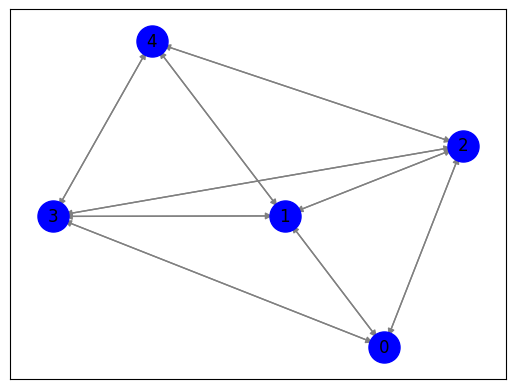

In [9]:
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.02 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Langkah 6: Closeness Centrality

In [10]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 1: 1.0000
Node 2: 1.0000
Node 3: 1.0000
Node 0: 0.8000
Node 4: 0.8000


In [11]:
print("\nNode Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat:
Node 1: Closeness Centrality = 1.0000
Kalimat: Salah satu manfaat yang secara nyata dapat dirasakan langsung bagi masyarakat dengan memberikan kepemilikan saham korporasi maupun anak usaha kepada Badan Usaha Milik Desa (BUMDes) di desa terdampak proyek infrastruktur.

Node 2: Closeness Centrality = 1.0000
Kalimat: BACA JUGA:Ganjar Pranowo Optimistis Bawa Ekonomi Indonesia Tumbuh 7%, Ini Strateginya"Kalau umpama membuat jalan tol, kita tawarkan saja, anda mau ganti rugi dibayar, atau mau dikonversi menjadi saham, sehingga demokrasi ekonominya kita berikan kepada mereka tanpa kemudian meninggalkan mereka," kata Ganjar, dalam acara Sarasehan 100 Ekonom Indonesia, Rabu (8/11/2023).Ganjar menceritakan, ketika itu ada proyek pembangunan pabrik semen di Rembang yang banyak ditentang masyarakat setempat.

Node 3: Closeness Centrality = 1.0000
Kalimat: Namun setelah dilakukan negosiasi terhadap perusahaan untuk setidaknya memberikan saham kepada masyarakat melalu

## Ringkas Semua Isi Berita

In [12]:
import spacy
import pandas as pd

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Inisialisasi DataFrame kosong untuk menyimpan ringkasan
df_ringkasan = pd.DataFrame(columns=['Ringkasan'])

# Loop untuk setiap baris data
for i in range(992):
    # Inisialisasi teks yang akan diringkas
    teks_ringkasan = data['Content'].iloc[i]

    # Analisis teks menggunakan spaCy
    doc = nlp(teks_ringkasan)

    # Ambil setiap kalimat dari dokumen
    kalimat_utama = [kalimat.text for kalimat in doc.sents]

    # Gabungkan beberapa kalimat sesuai kebutuhan Anda
    jumlah_kalimat = 10
    data_ringkas = " ".join(kalimat_utama[:jumlah_kalimat])

    # Tambahkan ringkasan ke DataFrame
    df_ringkasan = pd.concat([df_ringkasan, pd.DataFrame({'Ringkasan': [data_ringkas]})], ignore_index=True)


In [ ]:
df_ringkasan

,Ringkasan
0,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,..."
1,EKO Yuli Irawan mengucapkan permintaan maafnya...
2,MOTEGI - Marc Marquez girang setelah bisa naik...
3,KLASEMEN sementara perolehan medali Asian Game...
4,HASIL Asian Games 2023 akan dibahas di sini. T...
...,...
987,JAKARTA - Segini besaran uang makan dan uang l...
988,JAKARTA – Aturan Rancangan Peraturan Pemerinta...
989,JAKARTA - Menteri Pertanian Amran Sulaiman men...
990,JAKARTA - Calon Presiden Partai Perindo Ganjar...


In [13]:
# Save the DataFrame to a CSV file
df_ringkasan.to_csv('df_ringkasan.csv', index=False)

## Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [15]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transform data ringkasan
tfidf_matrix = tfidf_vectorizer.fit_transform(df_ringkasan['Ringkasan'])

# Dapatkan nama fitur (kata) yang sesuai dengan indeks matriks
fitur_kata = tfidf_vectorizer.get_feature_names_out()

# Buat DataFrame untuk menyimpan hasil TF-IDF
df_tfidf = pd.DataFrame(data=tfidf_matrix.toarray(), columns=fitur_kata)

# Tampilkan DataFrame hasil TF-IDF
print(df_tfidf)

      00  000  000cc   03   04   05  065   07   08   09  ...  zhongyi  zhu  \
0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
1    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
2    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
3    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
4    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
..   ...  ...    ...  ...  ...  ...  ...  ...  ...  ...  ...      ...  ...   
987  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
988  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
989  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
990  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
991  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   

     zhuhai  zigi  zii  zilberman  zinedine  zion  zona   zu  


# LDA

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, doc_topic_prior=0.2, topic_word_prior=0.1, random_state=42, max_iter=1)
lda_top = lda.fit_transform(df_tfidf)

In [17]:
# Membuat DataFrame dari hasil LDA
df_lda_top = pd.DataFrame(data=lda_top, columns=["Topic_1", "Topic_2", "Topic_3", "Topic_4", "Topic_5"])
df_lda_top

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,0.020388,0.919136,0.019985,0.019923,0.020567
1,0.910171,0.022742,0.022260,0.022503,0.022325
2,0.023274,0.023159,0.022761,0.022884,0.907922
3,0.021853,0.021794,0.021504,0.913308,0.021541
4,0.025906,0.900387,0.023720,0.024484,0.025502
...,...,...,...,...,...
987,0.021001,0.021150,0.915716,0.021178,0.020955
988,0.025523,0.898007,0.025556,0.025482,0.025433
989,0.024780,0.900454,0.024692,0.025036,0.025039
990,0.019884,0.019883,0.019650,0.920857,0.019726


## Naive bayes

In [18]:
y=data['Label']
X_train,X_test,y_train,y_test = train_test_split(df_lda_top,y,test_size=0.2,random_state=42)

NB = GaussianNB()
gaus=NB.fit(X_train, y_train)

y_pred = gaus.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.4371859296482412


## Metode KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model KNN
knn.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test)

# Mengukur akurasi model
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi KNN:", akurasi)

Akurasi KNN: 0.6532663316582915


## Metode Decission Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree
decision_tree.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = decision_tree.predict(X_test)

# Mengukur akurasi model
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi Decision Tree:", akurasi)


Akurasi Decision Tree: 0.5879396984924623


# Tanpa LDA

## Naive Bayes

In [21]:
y=data['Label']
X_train,X_test,y_train,y_test = train_test_split(df_tfidf,y,test_size=0.2,random_state=42)

NB = GaussianNB()
gaus=NB.fit(X_train, y_train)

y_pred = gaus.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.592964824120603


## Metode KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model KNN
knn.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test)

# Mengukur akurasi model
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi KNN:", akurasi)

Akurasi KNN: 0.7085427135678392


## Metode Decission Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree
decision_tree.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = decision_tree.predict(X_test)

# Mengukur akurasi model
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi Decision Tree:", akurasi)


Akurasi Decision Tree: 0.592964824120603


# Kesimpulan

Model tertinggi menggunakan metode KNN tanpa menggunakan LDA yaitu diangka 71%

Data ini tidak cocok untuk dilakukan reduksi dimensi karena alih alih menambah tingkat akurasi, ini malah menurunkan tingkat akurasi